In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KalmanFilter():
    def __init__(self, dt, u, std_acc, std_meas):
        self.dt = dt
        self.u = u
        self.std_acc = std_acc
        self.A = np.matrix([[1, self.dt],
                            [0, 1]])
        self.B = np.matrix([[(self.dt**2)/2], [self.dt]]) 
        self.H = np.matrix([[1,0]])
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0],[0]])

    def predict(self):
        # Ref :Eq.(9) and Eq.(10)
        # Update time state
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)
        # Calculate error covariance
        # P= A*P*A' + Q
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):
        # Ref :Eq.(11) , Eq.(11) and Eq.(13)
        # S = H*P*H'+R
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        # Calculate the Kalman Gain
        # K = P * H'* inv(H*P*H'+R)
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  # Eq.(11)
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  # Eq.(12)
        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P  # Eq.(13)

In [3]:
guilder_3ddet_trans_error_path = "/home/alan_khang/Desktop/guilder_det3d_trans_2025-08-02:19:51:48.txt"

with open(guilder_3ddet_trans_error_path, "r") as f:
    lines = f.readlines()

trans_by_delta_t = []
for line in lines:
    line = line.strip().split(',')
    line = [float(x) for x in line]
    trans_by_delta_t.append(line)

In [4]:
trans_by_delta_t = np.array(trans_by_delta_t)

In [5]:
trans_by_delta_t_x = trans_by_delta_t[:, 0]
trans_by_delta_t_z = trans_by_delta_t[:, 1]

In [6]:
trans_by_delta_t_x.shape

(648,)

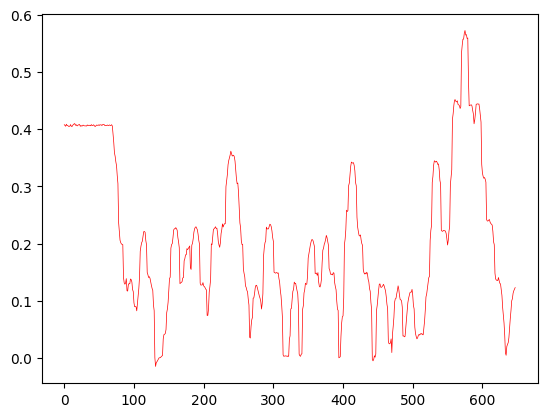

In [7]:
fig = plt.figure()
plt.plot(range(len(trans_by_delta_t_x)), trans_by_delta_t_x, label='X Translation', color='r', linewidth=0.5)
plt.show()

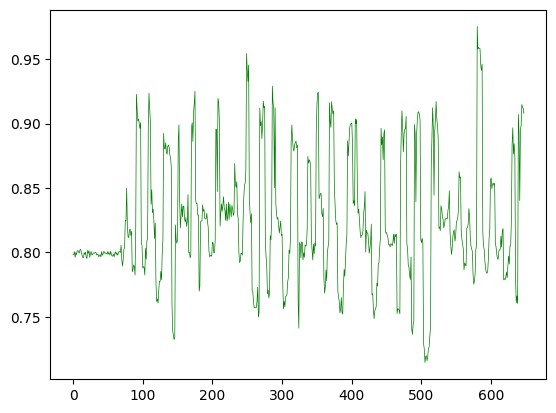

In [8]:
fig = plt.figure()
plt.plot(range(len(trans_by_delta_t_z)), trans_by_delta_t_z, label='Z Translation', color='g', linewidth=0.5)
plt.show()

In [9]:
x_predictions = []

u = 1
dt = 0.0667
std_acc = 0.125
std_meas = 0.01

kf = KalmanFilter(dt, u, std_acc, std_meas)

for x in trans_by_delta_t_x:
    x_predictions.append(kf.predict()[0])
    kf.update(x)

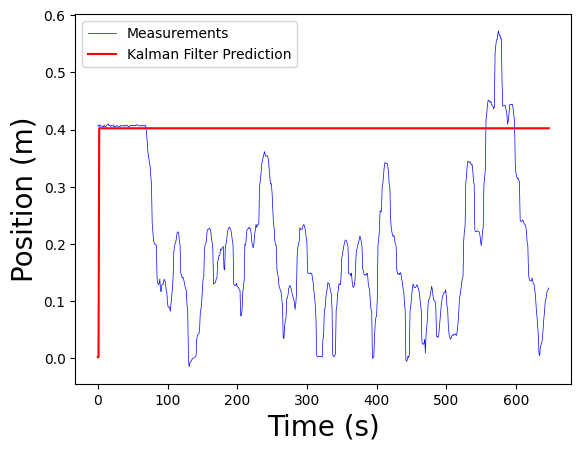

In [10]:
fig = plt.figure()
plt.plot(range(len(trans_by_delta_t_x)), trans_by_delta_t_x, label='Measurements', color='b',linewidth=0.5)
plt.plot(range(len(x_predictions)), np.squeeze(x_predictions), label='Kalman Filter Prediction', color='r', linewidth=1.5)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()

In [11]:
z_predictions = []

u = 1
dt = 0.0667
std_acc = 0.125
std_meas = 0.01

kf = KalmanFilter(dt, u, std_acc, std_meas)

for z in trans_by_delta_t_z:
    z_predictions.append(kf.predict()[0])
    kf.update(z)

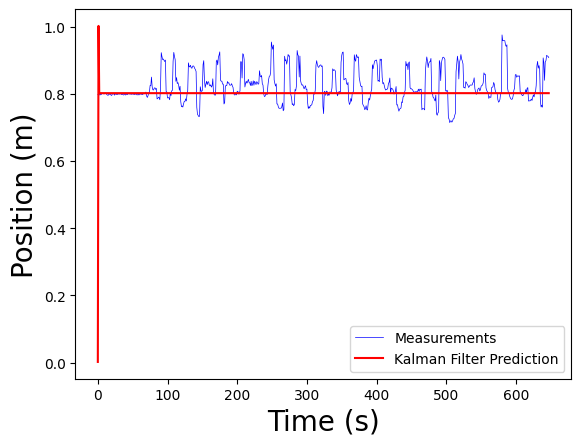

In [12]:
fig = plt.figure()
plt.plot(range(len(trans_by_delta_t_z)), trans_by_delta_t_z, label='Measurements', color='b',linewidth=0.5)
plt.plot(range(len(z_predictions)), np.squeeze(z_predictions), label='Kalman Filter Prediction', color='r', linewidth=1.5)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()

In [3]:
guilder_3ddet_trans_error_path = "/home/alan_khang/Desktop/guilder_det3d_trans_2025-08-02:22:07:50.txt"

with open(guilder_3ddet_trans_error_path, "r") as f:
    lines = f.readlines()

trans_by_delta_t = []
for line in lines:
    line = line.strip().split(',')
    line = [float(x) for x in line]
    trans_by_delta_t.append(line)
    
trans_by_delta_t = np.array(trans_by_delta_t)

In [4]:
trans_by_delta_t_x = trans_by_delta_t[:, 0]
trans_by_delta_t_z = trans_by_delta_t[:, 1]
trans_by_delta_t_x_smooth = trans_by_delta_t[:, 2]
trans_by_delta_t_z_smooth = trans_by_delta_t[:, 3]

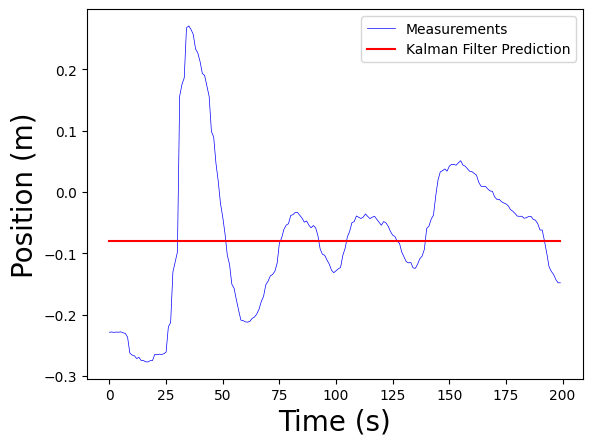

In [8]:
fig = plt.figure()
plt.plot(range(len(trans_by_delta_t_x[800:1000])), trans_by_delta_t_x[800:1000], label='Measurements', color='b',linewidth=0.5)
plt.plot(range(len(trans_by_delta_t_x_smooth[800:1000])), trans_by_delta_t_x_smooth[800:1000], label='Kalman Filter Prediction', color='r', linewidth=1.5)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()

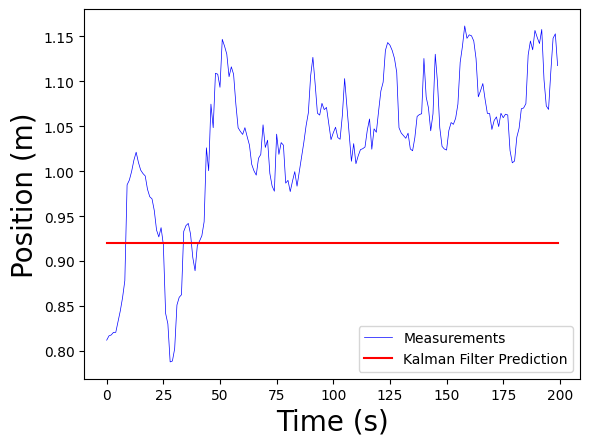

In [9]:
fig = plt.figure()
plt.plot(range(len(trans_by_delta_t_z[800:1000])), trans_by_delta_t_z[800:1000], label='Measurements', color='b',linewidth=0.5)
plt.plot(range(len(trans_by_delta_t_z_smooth[800:1000])), trans_by_delta_t_z_smooth[800:1000], label='Kalman Filter Prediction', color='r', linewidth=1.5)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()